**Shawn (HyungJoon) Yoon**

**5 hrs**

**Yes**

In [1]:
import pandas as pd
from linearmodels import OLS, IV2SLS
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

### The True Model 

Questions in this section can only be answered by someone having access to the true model
and to unobservable variables. The following cell generates our data based on the true model.

In [2]:
# generating data

np.random.seed(1) 
N = 10000

parent_income = 20000 + 200000 * np.random.rand(N)
charter = np.random.randint(0, 2, N)

preschool = 1. * (.2 * charter + (.5/250000) * parent_income 
                  > np.random.rand(N))

income = 20000 + 30000 * preschool + .75 * parent_income + 30000 * np.random.randn(N)
income *= (income > 0)

data = pd.DataFrame(
    data=dict(income=income, preschool=preschool, charter=charter, 
              parent_income=parent_income)
)
print(data.describe())
data.head()


              income     preschool       charter  parent_income
count   10000.000000  10000.000000  10000.000000   10000.000000
mean   119687.014735      0.338700      0.503300  119599.287227
std     56948.096746      0.473291      0.500014   57541.514460
min        -0.000000      0.000000      0.000000   20019.390138
25%     76703.367806      0.000000      0.000000   69218.711372
50%    119023.010721      0.000000      1.000000  120200.897681
75%    161769.669312      1.000000      1.000000  169043.215342
max    316246.619706      1.000000      1.000000  219975.157515


,income,preschool,charter,parent_income
0,132614.064482,0.0,0,103404.400941
1,163369.893688,0.0,0,164064.898688
2,14950.746840,0.0,1,20022.874963
3,185417.984020,1.0,0,80466.514526
4,-0.000000,0.0,1,49351.178163


In [3]:
s = np.random.randn(N)

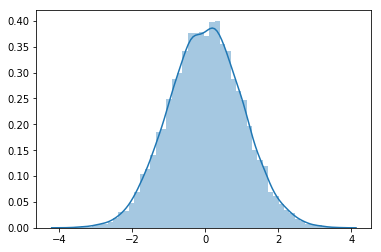

In [4]:
sns.distplot(s)

##### Question 1
What do `np.random.seed`, `np.random.rand`, `np.random.randint`, and `np.random.randn` do? (Hint: a Google search may be helpful. Note that `np` stands for Numpy, which is one of the packages downloaded in the first cell.)

Compute descriptive statistics for income (in the cell below).

Plot the distribution of `income` using `sns.distplot` (in the cell below).

**np.random.seed** = NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator. It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes.

**np.random.rand** = It Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

**np.random.randint** = Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

**np.random.randn** = It creates an array of specified shape and fills it with random values as per standard normal distribution.

In [5]:
data.head(10)

,income,preschool,charter,parent_income
0,132614.064482,0.0,0,103404.400941
1,163369.893688,0.0,0,164064.898688
2,14950.746840,0.0,1,20022.874963
3,185417.984020,1.0,0,80466.514526
4,-0.000000,0.0,1,49351.178163
5,25048.828765,0.0,1,38467.718954
6,42965.954592,0.0,1,57252.042276
7,71425.709363,0.0,1,89112.145409
8,123077.699488,0.0,0,99353.494846
9,174056.565189,1.0,1,127763.346801


income descriptive statistics
 count     10000.000000
mean     119687.014735
std       56948.096746
min          -0.000000
25%       76703.367806
50%      119023.010721
75%      161769.669312
max      316246.619706
Name: income, dtype: float64


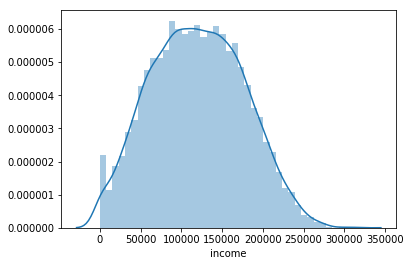

In [6]:
print('income descriptive statistics\n', data.income.describe()) # finish this line
sns.distplot(data.income) #finish this line

In [7]:
data[(data.charter > 0) & (data.preschool > 0)].count()

income           2187
preschool        2187
charter          2187
parent_income    2187
dtype: int64

##### Question 2
What is the probability of going to preschool if `charter==1` and `parent_income==100000`? (Hint: what kind of random variable does `np.random.rand()` generate?)

What is the probability of going to preschool given arbitrary values for `charter` and `parent_income < 250000`? (Hint: think about what you did in the question above and generalize it for arbitrary values.)

40%

In [8]:
#parent_income = 20000 + 200000 * np.random.rand(N)
#charter = np.random.randint(0, 2, N)

#preschool = 1. * (.2 * charter + (.5/250000) * parent_income 
#                  > np.random.rand(N))


P(preschool = 1 | charter = 1, parent_income = 100000) = 0.4

P(preschool = 1 | charter = 1, parent_income = 100000) = 1 * {(0.2 * (1) + (0.5/250000) * (100000)) > random_variable_between_1_and_0_with_uniform_distribution} ~ 0.4

**There is around 40 percent of going to preschool when charter is arbitrary and parent_income < 250000.**

#### Question 3
What is the true value of $\alpha_1$?

income = 20000 + 30000 * preschool + .75 * parent_income + 30000 * np.random.randn(N)

Therefore, $\alpha_1$ is 30000

#### Question 4
What is the correlation between `charter` and `parent_income`?

What is the correlation between `preschool` and `parent_income`?

What is the correlation between `charter` and `pre-school`?

Is `charter` a good instrument for `preschool`? Why?

In [9]:
# hint: hit \tab after writing 'data.cor' 
data.corr()

,income,preschool,charter,parent_income
income,1.000000,0.448153,0.051179,0.817068
preschool,0.448153,1.000000,0.203831,0.253681
charter,0.051179,0.203831,1.000000,-0.008320
parent_income,0.817068,0.253681,-0.008320,1.000000


Correlation between charter and parent_income: -0.00832

Correlation between preschool and parent_income: 0.253681

Correlation between charter and preschool: 0.203831

Charter is a good instrument for preschool, because the data shows that charter is correlated with preschool but not with parent_income which is presumably unobserved varaible (noise). 

### The Estimated Model

#### Question 5
Draw a scatter plot of `income` on `preschool` for the first 100 data points.

Run the OLS of `income` on `preschool`.

What value $\hat \alpha_1^{OLS}$ do you recover? 

Is it close to the true $\alpha_1$? In what direction is the bias? Explain?

                            OLS Estimation Summary                            
Dep. Variable:                 income   R-squared:                      0.2008
Estimator:                        OLS   Adj. R-squared:                 0.2008
No. Observations:               10000   F-statistic:                    2525.5
Date:                Wed, Dec 04 2019   P-value (F-stat)                0.0000
Time:                        09:06:03   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept   1.014e+05     627.60     161.60     0.0000   1.002e+05   1.027e+05
preschool   5.392e+04     1073.0     50.254     0.00

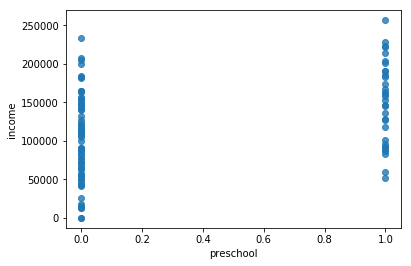

In [10]:
sns.regplot(x='preschool', y='income', data=data.loc[:100], fit_reg=False)

model = OLS.from_formula('income ~ preschool', data) # fill in the details, Google may be helpful (remember OLS is from linearmodels package)
                         
print(model.fit().summary) # fit the model and print the results

$\hat \alpha_1^{OLS}$ is 53920.

It is not so close to the true value of $\alpha_1$ which is 30000. 

It is biased in upward direction. Because there are many noises included in the model. Especially, within the noise, there is parent_income which shows high correlation (25%) with preschool. In other words, if one has wealthy parents, it is more likely that the one will go to preschool and it will end up with high income. But we are not sure if this is due to preschool or wealthy parents. 

#### Question 6
Run the OLS of `preschool` on `charter`. Get coefficient $\hat \beta_1$.

Run the OLS of `income` on `charter`. Get coefficient $\hat \gamma_1$.

Compute the 2SLS estimate of $\alpha_1$, $\hat \alpha_1^{2SLS}$.

Is it close to $\alpha_1$?

In [11]:
model2 = OLS.from_formula('preschool ~ 1 + charter', data)
print(model2.fit().summary)

                            OLS Estimation Summary                            
Dep. Variable:              preschool   R-squared:                      0.0415
Estimator:                        OLS   Adj. R-squared:                 0.0415
No. Observations:               10000   F-statistic:                    434.32
Date:                Wed, Dec 04 2019   P-value (F-stat)                0.0000
Time:                        09:06:04   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.2416     0.0061     39.778     0.0000      0.2297      0.2535
charter        0.1929     0.0093     20.840     0.00

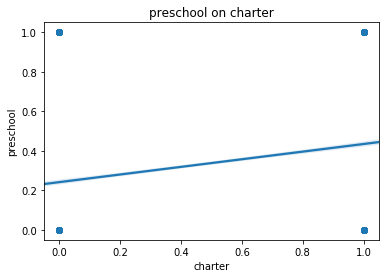

(Text(0.5, 1.0, 'preschool on charter'), None)

In [12]:
sns.regplot(x='charter', y='preschool', data = data).set_title(
    'preschool on charter'), plt.show()

$\hat \beta_1$ = 0.1929

$\hat \beta_0$ = 0.2416

In [13]:
model3 = OLS.from_formula('income ~ 1 + charter', data)
print(model3.fit().summary)

                            OLS Estimation Summary                            
Dep. Variable:                 income   R-squared:                      0.0026
Estimator:                        OLS   Adj. R-squared:                 0.0025
No. Observations:               10000   F-statistic:                    26.268
Date:                Wed, Dec 04 2019   P-value (F-stat)                0.0000
Time:                        09:06:07   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept   1.168e+05     799.60     146.01     0.0000   1.152e+05   1.183e+05
charter        5829.0     1137.3     5.1252     0.00

$\hat \gamma_1$ = 5829

$\hat \gamma_0$ = 101400

$\hat \alpha_1^{2SLS}$ = $\hat \gamma_1$ / $\hat \beta_1$ = 5829 / 0.1929 = 30217.729

In [14]:
5829/0.1929

30217.72939346812

$\hat \alpha_0^{2SLS}$ = $\hat \gamma_0$ - ($\hat \alpha_1^{2SLS}$ * $\hat \beta_0$) = 101400 - (30217.729 * 0.2416)

In [15]:
101400-(30217.729*0.2416)

94099.3966736

The intercept ($\hat \alpha_0^{2SLS}$) is off by little, but approximately correct. 

Now, therefore the predicted true model is the following: 

Income = $\hat \alpha_0^{2SLS}$ + $\hat \alpha_1^{2SLS}$(Preschool)

Income = 94099 + 30217(Preschool)

#### Question 7
Using the `IV2SLS` module of `linearmodels`, compute the 2SLS estimate of $\alpha_1$ instrumenting `preschool` with `charter` directly.

In [16]:
model5 = IV2SLS.from_formula('income ~  1 + [preschool ~ charter]', data) # fill the details
print(model5.fit().summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 income   R-squared:                      0.1620
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1619
No. Observations:               10000   F-statistic:                    31.260
Date:                Wed, Dec 04 2019   P-value (F-stat)                0.0000
Time:                        09:06:11   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept   1.095e+05     1898.9     57.642     0.0000   1.057e+05   1.132e+05
preschool   3.021e+04     5403.5     5.5911     0.00

In [17]:
data.head()

,income,preschool,charter,parent_income
0,132614.064482,0.0,0,103404.400941
1,163369.893688,0.0,0,164064.898688
2,14950.746840,0.0,1,20022.874963
3,185417.984020,1.0,0,80466.514526
4,-0.000000,0.0,1,49351.178163
